In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/Copyofanimal.zip

Archive:  /content/gdrive/MyDrive/Copyofanimal.zip
   creating: animal_dataset/images/
   creating: animal_dataset/images/train/
  inflating: animal_dataset/images/train/1.jpg  
  inflating: animal_dataset/images/train/10.jpg  
  inflating: animal_dataset/images/train/1000.jpg  
  inflating: animal_dataset/images/train/1001.jpg  
  inflating: animal_dataset/images/train/1002.jpg  
  inflating: animal_dataset/images/train/1003.jpg  
  inflating: animal_dataset/images/train/1004.jpg  
  inflating: animal_dataset/images/train/1005.jpg  
  inflating: animal_dataset/images/train/1006.jpg  
  inflating: animal_dataset/images/train/1007.jpg  
  inflating: animal_dataset/images/train/1008.jpg  
  inflating: animal_dataset/images/train/1009.jpg  
  inflating: animal_dataset/images/train/101.jpg  
  inflating: animal_dataset/images/train/1010.jpg  
  inflating: animal_dataset/images/train/1011.jpg  
  inflating: animal_dataset/images/train/1012.jpg  
  inflating: animal_dataset/images/train/1013

In [ ]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install
import torch
import utils
display = utils.notebook_init()  # checks
     

YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
!python train.py --img 415 --batch 31 --epochs 101 --data coco128.yaml --weights yolov5s.pt --cache
     


train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=101, batch_size=31, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 196 --conf 0.25 --source /content/animal_dataset/images/train/1001.jpg

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/animal_dataset/images/train/1001.jpg, data=data/coco128.yaml, imgsz=[196, 196], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ --img-size [196, 196] must be multiple of max stride 32, updating to [224, 224]
image 1/1 /content/animal_dataset/images/train/1001.jpg: 160x224 1 cow, 12.1ms
Speed: 0.3ms pre-process, 12.1ms inference, 1.5ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/detect/exp3


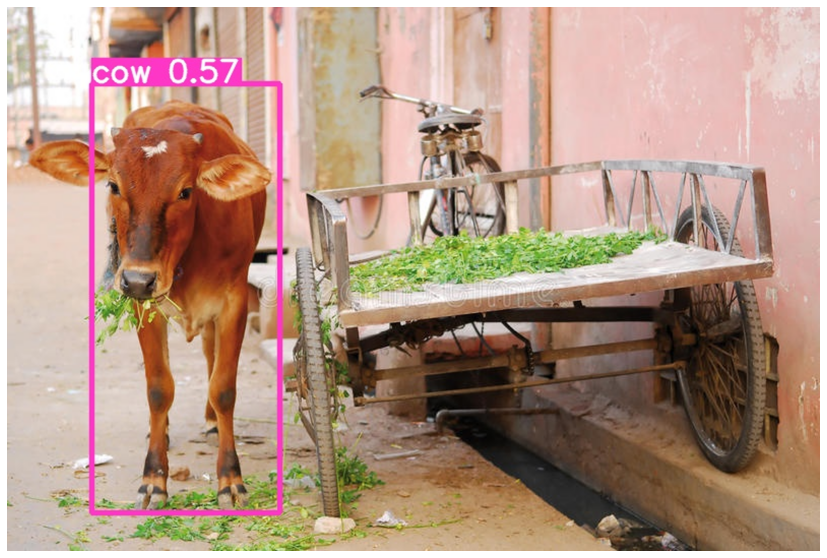

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("/content/yolov5/runs/detect/exp3/1001.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/animal_dataset/images/train/1001

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/animal_dataset/images/train/1001, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Traceback (most recent call last):
  File "detect.py", line 261, in <module>
    main(opt)
  File "detect.py", line 256, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.8/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "detect.py", line 111, in run


In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = detect()

cap = cv2.VideoCapture(0)

ret, frame1 = cap.read()

tiger_bbox1, human_bbox1 = model.detect(frame1, conf_thres=0.5, classes=['tiger', 'human'])

moving = True

while True:
    ret, frame2 = cap.read()
    if not ret:
        break

    tiger_bbox2, human_bbox2 = model.detect(frame2, conf_thres=0.5, classes=['tiger', 'human'])

    for tiger_bbox1, tiger_bbox2 in zip(tiger_bbox1, tiger_bbox2):
        for human_bbox1, human_bbox2 in zip(human_bbox1, human_bbox2):
            distance1 = np.sqrt((tiger_bbox1[0]-human_bbox1[0])**2 + (tiger_bbox1[1]-human_bbox1[1])**2)
            distance2 = np.sqrt((tiger_bbox2[0]-human_bbox2[0])**2 + (tiger_bbox2[1]-human_bbox2[1])**2)
            
            if distance2 < distance1:
                if not moving:
                    print("ALERT: Tiger detected nearby and the human is not moving")
                else:
                    print("ALERT: Tiger detected nearby")
            else:
                print("No alert")
                
    distance = np.sqrt((human_bbox1[0]-human_bbox2[0])**2 + (human_bbox1[1]-human_bbox2[1])**2)
    if distance > 10:
        moving = True
    else:
        moving = False

    frame1 = frame2
    tiger_bbox1 = tiger_bbox2
    human_bbox1 = human_bbox2

cap.release()


